running scarlet on legacysurvey pipeline, using simulated input  <br>
We see a bias in the flux measurement for scarlet, this is because:<br>
1. This test is perfromed on 'coadd' image. The coadds are directly adding up all images without any treatment. The psf dispersion is high across different exposures, and here we just use a weighed psf. <br>
2. Since the images are not properly coadded, scarlet tend to render the sources as multiple components, while actually there probably is only one. <br>
3. Here the input galaxies are parametric models, the same as legacypipe used for modelling. Therefore it is also expected that legacypipe version has smaller error here. <br>
4. despite all these, we can still see scarlet recover weird shaped galaxies even with such a bad coadd <br>
5. a better way to use scarlet is to measure on a multi-exposure basis, so that we ensure accurate psf treatment. This is more important for surveys with relatively unstable psf (like this, psfsize ranges 0.8-1.5). This can be achieve by adding one more component in matrix, denoting multiple exposures in one band: with fixed spectrum matrix A, shape matrix S, different psf P for each exposure. Then fitting over the sum of all exposures. 


In [1]:
%pylab inline
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [43]:
fn = "/global/cfs/cdirs/desi/users/huikong/decals_sgc/subset/subset_scarlet_rs0.fits"
dat = fits.getdata(fn)
dat = dat[dat['matched']]

Text(0.5, 0, '$\\Delta flux\\_z$')

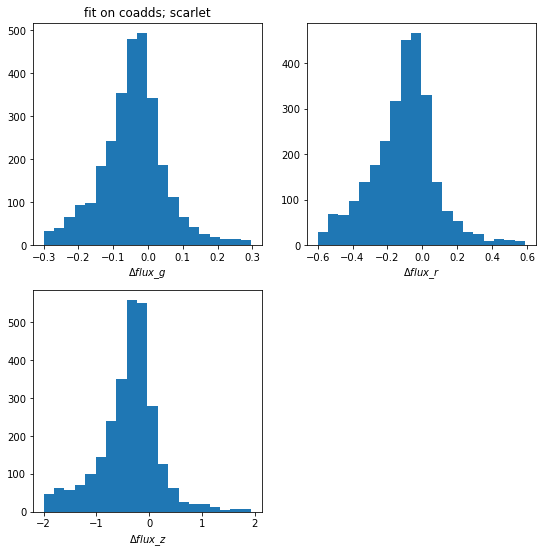

In [44]:
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
plt.title('fit on coadds; scarlet')
m = dat['flux_g']-dat['sim_gflux']
sel = np.abs(m)<0.3
plt.hist(m[sel],bins=20)
plt.xlabel(r'$\Delta flux\_g$')

plt.subplot(2,2,2)
m = dat['flux_r']-dat['sim_rflux']
sel = np.abs(m)<0.6
plt.hist(m[sel],bins=20)
plt.xlabel(r'$\Delta flux\_r$')

plt.subplot(2,2,3)
m = dat['flux_z']-dat['sim_zflux']
sel = np.abs(m)<2
plt.hist(m[sel],bins=20)
plt.xlabel(r'$\Delta flux\_z$')

In [36]:
fn = "/global/cfs/cdirs/desi/users/huikong/decals_sgc/subset/subset_rs0.fits"
dat = fits.getdata(fn)
dat = dat[dat['matched']]

This is the standard legacypipe fitting

Text(0.5, 0, '$\\Delta flux\\_z$')

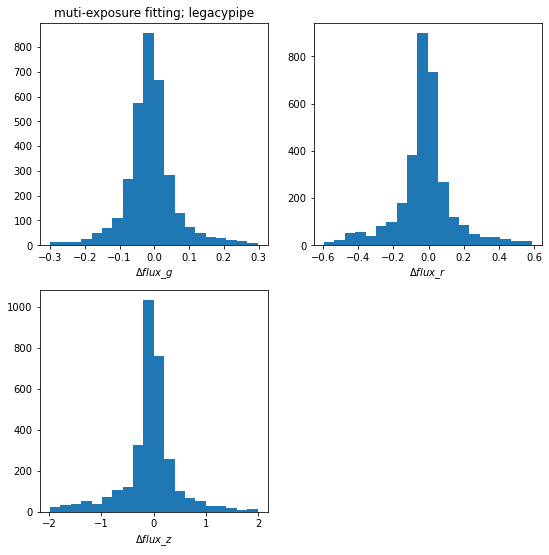

In [40]:
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
plt.title('muti-exposure fitting; legacypipe')
m = dat['flux_g']-dat['sim_gflux']
sel = np.abs(m)<0.3
plt.hist(m[sel],bins=20)
plt.xlabel(r'$\Delta flux\_g$')

plt.subplot(2,2,2)
m = dat['flux_r']-dat['sim_rflux']
sel = np.abs(m)<0.6
plt.hist(m[sel],bins=20)
plt.xlabel(r'$\Delta flux\_r$')

plt.subplot(2,2,3)
m = dat['flux_z']-dat['sim_zflux']
sel = np.abs(m)<2
plt.hist(m[sel],bins=20)
plt.xlabel(r'$\Delta flux\_z$')

In [45]:
fn = "/global/cfs/cdirs/desi/users/huikong/decals_sgc/subset/subset_more2_rs0.fits"
dat = fits.getdata(fn)
dat = dat[dat['matched']]

Text(0.5, 0, '$\\Delta flux\\_z$')

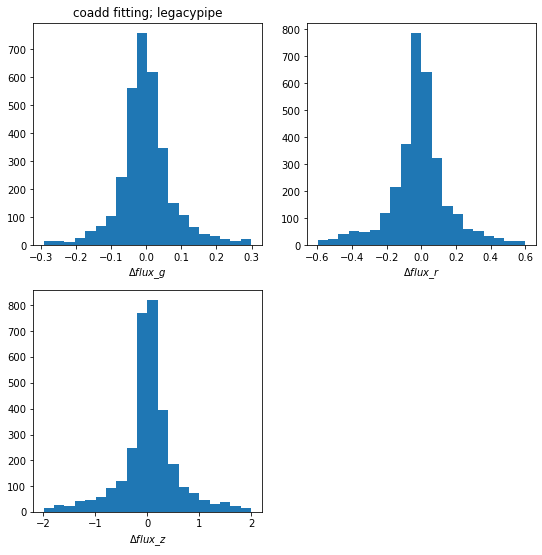

In [47]:
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
plt.title('coadd fitting; legacypipe')
m = dat['flux_g']-dat['sim_gflux']
sel = np.abs(m)<0.3
plt.hist(m[sel],bins=20)
plt.xlabel(r'$\Delta flux\_g$')

plt.subplot(2,2,2)
m = dat['flux_r']-dat['sim_rflux']
sel = np.abs(m)<0.6
plt.hist(m[sel],bins=20)
plt.xlabel(r'$\Delta flux\_r$')

plt.subplot(2,2,3)
m = dat['flux_z']-dat['sim_zflux']
sel = np.abs(m)<2
plt.hist(m[sel],bins=20)
plt.xlabel(r'$\Delta flux\_z$')

In [48]:
dat['brickname']

chararray(['0001m002', '0001m002', '0001m002', ..., '0001m095',
           '0001m095', '0001m095'], dtype='<U8')